# Unit 3 Homework

In [28]:
#预编译
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
import statistics as sta

data = pd.read_csv("Datas\data.csv")

# 1 置信区间

## 1 乳腺癌样本数据

### 1.1 在同一个图中画出良性与恶性乳腺癌(radius_mean)的观测值密度分布图

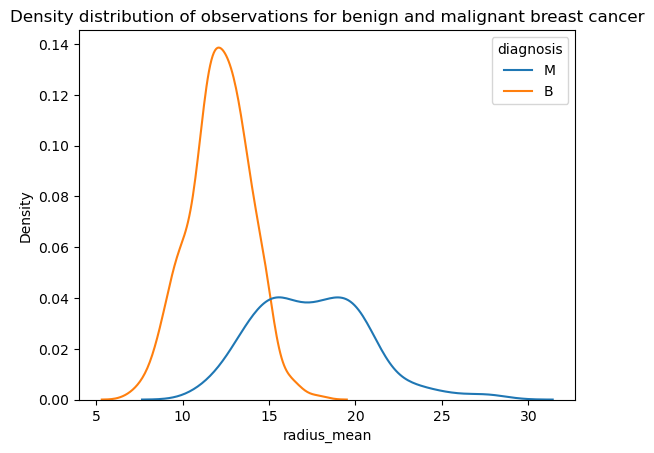

In [29]:
sns.kdeplot(x="radius_mean", data=data, hue="diagnosis")
plt.title("Density distribution of observations for benign and malignant breast cancer")
plt.show()

### 1.2 良性与恶性乳腺癌的病灶尺寸均值的90%置信区间

In [30]:
#计算ci的函数
def calc_ci(df, alpha):
    n = len(df)
    s = df.var(ddof=1) ** 0.5
    m = df.mean()
    isf = stats.t.isf(alpha/2, n-1)     #方差未知，用样本方差，做t检验
    moe = isf * s / (n ** 0.5)
    return m-moe, m+moe

alpha1 = 0.1     #α应该是一个比较小的量，求上侧分位数用

print("the 0.9 CI of benign is",calc_ci(data[data["diagnosis"]=="B"]["radius_mean"],alpha1))
print("the 0.9 CI of malignant is",calc_ci(data[data["diagnosis"]=="M"]["radius_mean"],alpha1))

the 0.9 CI of benign is (11.991117165972906, 12.30193045307471)
the 0.9 CI of malignant is (17.099284577366493, 17.826375799991997)


### 1.3 两组均值差异的90%置信区间

In [31]:
#计算两个独立正态总体的均值差的CI，方差未知且不相等,直接调用demo里的Welch's t-检验（概统里是用近似于Z分布来做）
def dmean_ci_ind_welch_t(data1,data2,alpha=0.05):
    n1,n2,var1,var2=len(data1),len(data2),np.var(data1,ddof=1),np.var(data2,ddof=1)
    M=data1.mean()-data2.mean()   
    v=(var1/n1+var2/n2)**2/((1/(n1-1)*(var1/n1)**2)+(1/(n2-1)*(var2/n2)**2))
    Ta=stats.t.isf(alpha/2,v,0,1)
    moe=Ta*np.sqrt(var1/n1+var2/n2)
    return M-moe,M+moe

print("90 per cent confidence interval for", 
      "the difference between the means of", 
      "the two groups is","(B-M)",
     dmean_ci_ind_welch_t(data[data["diagnosis"]=="B"]["radius_mean"],data[data["diagnosis"]=="M"]["radius_mean"],alpha1))

90 per cent confidence interval for the difference between the means of the two groups is (B-M) (-5.711311893076699, -4.9213008652341745)


## 2 用柱状图来可视化两组radius_mean的均值

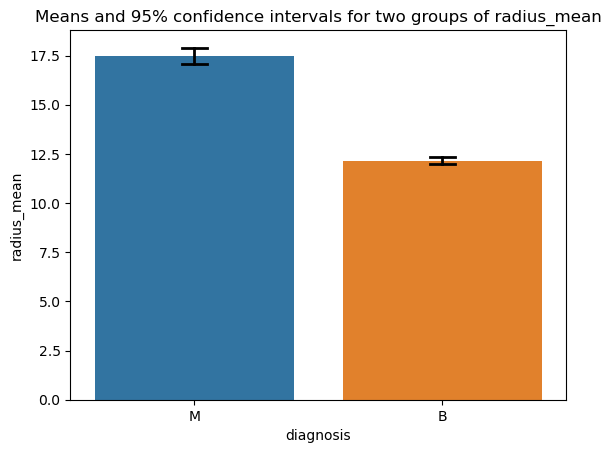

In [32]:
alpha2 = 0.05
sns.barplot(data=data, x="diagnosis", y="radius_mean",
            errorbar=("ci", (1-alpha2)*100), errcolor="black",
            capsize=0.1, errwidth=2)
            #直接用errorbar中的ci=95计算errorbar的长度，
            #capsize设置横杠长度，errwidth设置竖线宽度
plt.title("Means and 95% confidence intervals for two groups of radius_mean")
plt.show()

#或者如下也行
# def calc_error(df,alpha):
#     n = len(df)
#     s = df.var(ddof=1) ** 0.5
#     isf = stats.t.isf(alpha / 2, n - 1)  # 方差未知，用样本方差，做t检验
#     moe = isf * s / (n ** 0.5)
#     return moe
#
# B_error = calc_error(data[data["diagnosis"]=="B"]["radius_mean"], alpha2)
# M_error = calc_error(data[data["diagnosis"]=="M"]["radius_mean"], alpha2)
# B_mean = data[data["diagnosis"]=="B"]["radius_mean"].mean()
# M_mean = data[data["diagnosis"]=="M"]["radius_mean"].mean()
# df2 = {"diagnosis": ["B", "M"], "radius_mean": [B_mean, M_mean], "error": [B_error, M_error]}


## 3 Exercise in book

### 3.1 练习4.6

1. 假。样本可以直接计算，而且95%的置信区间不是这个意思
2. 假。样本量足够大了，根据中心极限理论可以认为近似于正态分布
3. 假。样本可以直接算，置信区间用于对总体的估计
4. 真。置信区间的含义
5. 真。95%的上侧分位数更大，区间长度更大（计算公式见3.2）
6. 真。$(80.31,89.11)=(80.31+89.11)/2\pm4.4=84.71\pm4.4$

### 3.2 练习4.8

已知$n=5534,\overline{x}=23.44,s=4.72,\alpha=0.05$，要估计$\mu$  
由于$\sigma$未知，故使用
$$\frac{\overline{x}-\mu}{s/\sqrt{n}}\sim t(n-1)$$
t分布是偶分布  
$$\therefore P(-t_{0.025}(n-1)<\frac{\overline{x}-\mu}{s/\sqrt{n}}<t_{0.025}(n-1))=0.95$$  
$$\Rightarrow \mathsf{CI}=(\overline{x}-t_{0.025}(n-1)\frac{s}{\sqrt{n}},\overline{x}+t_{0.025}(n-1)\frac{s}{\sqrt{n}})$$
带入数据，计算得到$t_{0.025}(5533)=1.96$
$$\therefore \mathsf{CI}=(23.32,23.56)$$
  
  <br>
  
**解释**：  
2006-2010年该国家妇女的平均初婚年龄在（23.32，23.56）岁的概率是95%  
  
  <br>
  
**假设**：
1. 抽样是随机的
2. 样本的分布是接近正态分布的
3. 样本量足够大了

# 2 零假设显著性检验

## Exercise in Book 4.20

### (a)检验父母辈的平均智商

假设：$H_0:\mu\geq\mu_0;H_1:\mu<\mu_0$  
总体方差未知，检验均值，用t检验
$$\frac{\overline{x}-\mu_0}{s/\sqrt{n}}\sim t(n-1)$$
$$\Rightarrow P(\frac{\overline{x}-\mu_0}{s/\sqrt{n}}\geq t_{\alpha}(n-1))=1-\alpha$$
故若$\frac{\overline{x}-\mu_0}{s/\sqrt{n}}>t_{\alpha}(n-1)$，我们便认为$H_0$成立，均值高  
代入数据，得到
$$\frac{\overline{x}-\mu_0}{s/\sqrt{n}}=16.8;t_{0.1}(35)=1.31\Rightarrow \frac{\overline{x}-\mu_0}{s/\sqrt{n}}>>t_{0.1}(35)$$
资优儿童母亲的平均智商不同于普通人群的平均智商

### (b)计算资优儿童母亲平均智商的 90% 置信区间

由于$\sigma$未知，故使用
$$\frac{\overline{x}-\mu}{s/\sqrt{n}}\sim t(n-1)$$
$$\therefore P(-t_{0.05}(n-1)<\frac{\overline{x}-\mu}{s/\sqrt{n}}<t_{0.05}(n-1))=0.90$$  
$$\Rightarrow \mathsf{CI}=(\overline{x}-t_{0.05}(n-1)\frac{s}{\sqrt{n}},\overline{x}+t_{0.05}(n-1)\frac{s}{\sqrt{n}})$$
$$\therefore \mathsf{CI}=(116.4, 120.0)$$

### (c)假设检验的结果和置信区间是否一致

**是一致的**  
假设检验的结果显示这些母亲的智商平均值显著高于普通人，而这些母亲的智商的平均值的90%置信区间也不包括普通人的平均智商*100*  
二者都显示了我有**显著的把握**，这些母亲的智商高于普通人

# 3 t-检验 

## Exercise in Book

### 3.1 练习5.18

#### (a)阅读和写作的平均分是否有明显差异？

通过boxplot上的表示均值的黑线，二者的均值都在50左右，认为二者均值**无明显差异**

#### (b)每个学生的阅读和写作分数是否相互独立

根据右侧的人数分布直方图（类似于正态分布），如果二者的分数是不相关的，那么不会呈现类似正态分布，所以二者是相关的  
由于独立一定不相关，那么相关一定不独立，所以是**不独立**的

#### (c)数据是否能令人信服地证明两次考试的平均分之间存在差异？

由于是配对的样本，且总体方差未知，故用t检验，令$x=x_r-x_w$，其中x为样本  
故假设：$H_0:\mu=0;H_1:\mu\neq0$  
$$\therefore \frac{\overline{x}-0}{s/\sqrt{n}}\sim t(n-1)$$
$$\Rightarrow P(|t(n-1)|>|\frac{\overline{x}-0}{s/\sqrt{n}}|)=p$$

In [33]:
print("p=",2*(1-stats.t.cdf(0.867, 200-1)))

p= 0.3869862125527166


p很大，即假设的$\mu=0$比较好的使$\frac{\overline{x}-\mu}{s/\sqrt{n}}$符合t分布，计算结果不是小概率事件  
我不能拒绝$H_0$

In [34]:
def calc_ci(n, alpha, mean, s):
    m = mean
    isf = stats.t.isf(alpha/2, n-1)   
    moe = isf * s / (n ** 0.5)
    return m-moe, m+moe
print("差异的99%CI=",calc_ci(200,0.01,-0.545,8.887))

差异的99%CI= (-2.179332794905891, 1.089332794905891)


是包含0的，我有99%的把握，所以在概率上我接受$H_0$

#### (d)置信区间是否包括零

由于p很大了，认为包括零  
实际上，计算99%置信区间为(-2.179332794905891, 1.089332794905891)  
所以我有99%的把握

In [35]:
def calc_ci(n, alpha, mean, s):
    m = mean
    isf = stats.t.isf(alpha/2, n-1)   
    moe = isf * s / (n ** 0.5)
    return m-moe, m+moe
print(calc_ci(200,0.01,-0.545,8.887))

(-2.179332794905891, 1.089332794905891)


### 3.2 练习5.24

#### 0.99 克拉和 1 克拉钻石的平均标准化价格之间是否存在差异，以及95%CI

假设：$H_0:\mu_1=\mu_2;H_1:\mu_1\neq\mu_2$

In [36]:
def f1(mean1,s1,n1,mean2,s2,n2):
    var1=s1**2
    var2=s2**2
    M = abs(mean1 - mean2)
    v=(var1/n1+var2/n2)**2/((1/(n1-1)*(var1/n1)**2)+(1/(n2-1)*(var2/n2)**2))
    x = np.sqrt(var1/n1+var2/n2)
    return stats.t.cdf(M/x, v)
print("p=",2*(1-f1(44.51, 13.32, 23, 56.81, 16.13, 23)))

p= 0.0072701759340148


p<0.05，认为$H_1$成立，二者有显著差异

In [37]:
def f2(mean1,s1,n1,mean2,s2,n2,alpha=0.05):
    var1=s1**2 
    var2=s2**2
    M=mean1-mean2   
    v=(var1/n1+var2/n2)**2/((1/(n1-1)*(var1/n1)**2)+(1/(n2-1)*(var2/n2)**2))
    Ta=stats.t.isf(alpha/2,v,0,1)
    moe=Ta*np.sqrt(var1/n1+var2/n2)
    return M-moe,M+moe
print("均值差的95%CI=",f2(44.51, 13.32, 23, 56.81, 16.13, 23))

均值差的95%CI= (-21.09969341002821, -3.5003065899717996)


计算均值差的95%置信区间，发现不包括零，有95%的把握二者均值明显不同

### 3.3  练习5.26

#### (a)是否有证据表明雄性雏鸡和雌性雏鸡的蛋大小不同？

In [38]:
print("雄性蛋-雌性蛋的90%CI=",f2(1619.95,127.54,80,1584.20,102.51,48,0.1))

雄性蛋-雌性蛋的90%CI= (1.6770341915652693, 69.82296580843473)


In [39]:
print("雄性蛋-雌性蛋的95%CI=",f2(1619.95,127.54,80,1584.20,102.51,48,0.05))

雄性蛋-雌性蛋的95%CI= (-4.951183300392628, 76.45118330039263)


In [40]:
print("雄性蛋-雌性蛋的p=",2*(1-f1(1619.95,127.54,80,1584.20,102.51,48)))

雄性蛋-雌性蛋的p= 0.08456384966941477


在α=0.1的水平上，我可以认为而这有差别，更重的蛋倾向于是雄性  
但在α=0.05的水平上，我就不这么认为了

#### (b)是否有证据表明活的雏鸡和死的雏鸡的蛋大小不同？

In [41]:
print("活的蛋-死的蛋的95%CI=",f2(1605.87,126.32,89,1606.91,103.46,42,0.05))

活的蛋-死的蛋的95%CI= (-42.395724027639396, 40.315724027639014)


In [42]:
print("活的蛋-死的蛋的p=",2*(1-f1(1605.87,126.32,89,1606.91,103.46,42)))

活的蛋-死的蛋的p= 0.9602945128348399


无论从置信区间或是假设检验来看，都无法认为在α=0.05的水平下二者有显著差异

#### (c)是否有证据表明先生的雏鸡和后生的雏鸡的蛋大小不同？

In [43]:
print("先-后的95%CI=", f2(1581.98,155.95,22,1659.62,124.59,20,0.05))

先-后的95%CI= (-165.35198704999075, 10.071987049991009)


In [44]:
print("先-后的90%CI=", f2(1581.98,155.95,22,1659.62,124.59,20,0.1))

先-后的90%CI= (-150.70836816448983, -4.571631835509919)


In [45]:
print("先-后的p=",2*(1-f1(1581.98,155.95,22,1659.62,124.59,20)))

先-后的p= 0.08116624629859714


在α=0.1的水平上，我认为有显著差异，但在α=0.05的水平上，我不这么认为

### 3.4  练习5.28

#### 是否表明转基因雏鸡和非转基因雏鸡的孵化重量存在差异？

In [46]:
print("转-非的p=",2*(1-f1(45.14,3.32,54,44.99,4.57,54)))

转-非的p= 0.8456936599324996


In [47]:
print("转-非的90%CI=",f2(45.14,3.32,54,44.99,4.57,54,0.1))

转-非的90%CI= (-1.1265967234683805, 1.4265967234683776)


综合p值和90%CI，认为二者没有显著差异

# 4 ANOVA

## 如果招募一批志愿者，随机平均分成m个剂量组进行实验，每组n个被试，对观测结果（满足正态分布，方差齐性）进行单因素方差分析，得到F(3,56)= 3.72

### A. m, n分别等于多少？

由ANOVA的和F分布的定义来看，若为F(M,N)，则有M+1组，共N+M+1人。故共4组，共60人，每组15人  

### B. 这个ANOVA分析进行F检验的零假设是什么？

是四组的观测结构均值相等，即$\mu_1=\mu_2=\mu_3=\mu_4$

### C. F值对应的p值是多少，如果以p=0.05为显著性水平阈值，能否拒绝零假设？

In [48]:
print(stats.f.sf(3.72,3,56))

0.016439151106134482


p<<0.05，我拒绝$H_0$

### D. 如果组内方差MSW是20.5， 组间的方差是多少？

$$F=MSB/MSW \Rightarrow MSB=MSW\times F=20.5\times 3.72=76.26$$

### E. 总体离差平方和，组间离差平法和，组内离差平方和 （即课件中的SST, SSB, SSW）分别是多少？

$$SSB=MSB\times df_b=76.26\times 3=228.78$$
$$SSW=MSW\times df_w=20.5\times 56=1148$$
$$SST=SSB+SSW=228.78+1148=1376.78$$

### F.  ANOVA中F检验对应的效应量(effect size) eta2是多少？
$$\eta^2=\frac{SSB}{SST}=228.78/1376.78=0.166$$

### G. 参考本周Python例子中的pingouin.anova 输出的格式, 写出本题的ANOVA分析结果表

|Source|SS|DF|MS|F|p-unc|np2|
|------|--|--|--|-|-----|---|
|Group |228.78|3|76.26|3.72|0.0164|0.166|
|Within|1148|56|20.5|NaN|NaN|NaN|

### H. 按照APA格式汇报并解释最终结果

根据1-Way ANOVA检验的结果，四组之间的样本均值存在显著差异（F(3,56)=3.72,p=.0164;eta2=0.166）